# Laboratorio 1 - Parte 2

### Regresión Regresión logística y FDG's

### Universidad de Antioquia

### Facultad de Ingeniería

### Ingeniería de Sistemas

### Ude@ - 2018-I

#### Profesor: Antonio Tamayo Herrera


### Estudiantes:

Rodrigo Antonio Porras Martinez
CC: 1039459720.

David De Jesus Yepes Isaza
CC: 1020455542

## Guía del laboratorio

En este archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

## Ejercicio 1

En este laboratorio se va a realizar un procedimiento análogo al del laboratorio anterior, pero con el modelo de regresión logística que sirve para resolver problemas de clasificación (en principio biclase).

Analice los siguientes métodos a la luz de la teoría vista para el modelo de regresión logística. Una vez comprenda su funcionamiento proceda a completar el código del método de gradiente descendente con la regla de actualización de los parámetros

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

para el problema de clasificación. Tenga presente que si ya implementó la regla de actualización de parámetros para el modelo de regresión polinomial múltiple, este punto es trivial, ya que solo tiene que incluir la función sigmoidal tal como lo vimos en la teoría.

Además se pide graficar el error de clasificación durante las iteraciones del algorítmo. La gráfica debe llevar título y los correspondientes nombres de los ejes.

Nota: observe que el método logistic_regression ya hace el llamado a la función sigmoidal

In [84]:
#Sigmoidal
def sigmoidal(z):
    
    #Complete la siguiente línea con el código para calcular la salida de la función sigmoidal
    s = 1/(1+np.exp(-z))
    
    #Complete el código para realizar la gráfica de la función aquí
    plt.plot(z,s)
    plt.ylabel('g(z)')
    plt.xlabel('z')
    plt.title(u'Funcion Sigmoidal\n')
    #plt.show()
    
    return s


#Modelo Regresión logística
def logistic_regression(X, W):
    Yest = np.dot(X,W)  #con np.dot se realiza el producto matricial. Aquí X (extendida) tiene dim [Nxd] y W es dim [dx1]
    Y_lest = sigmoidal(Yest)
    #print(Y_lest)
    #print(np.shape(Y_lest))
    #Se llevan los valores a 1 o 0 para los que está definido el modelo de regresión logística
    pos = 0
    for tag in Y_lest:
        
        if (tag > 0.5):
            Y_lest[pos] = 1
        elif (tag < 0.5):
            Y_lest[pos] = 0
        
        pos += 1
    
    return Y_lest    #Esta variable contiene la salida de sigm(f(X,W))


#Potencia de polinomio (En es laboratorio solo trabajaremos el caso lineal (grado 1), pero se pueden probar otras fronteras)
def potenciaPolinomio(X,grado):
    X2 = X
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2


#Para calcular el error del modelo de regresión logística
def error_logistic(Y_lest, Y):
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    
    error = error/np.size(Y)
    
    #print "La eficiencia en esta iteración fue: "+str(1-error)+'\n'
    
    return error

#Gradiente descendente para regresión logística
def gradiente_descendente_logistic(X,Y,grado,eta):
    
    X_original = X
    Y_original = Y
    
    #Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
    X = potenciaPolinomio(X,grado)
     
    
    #X es la matriz de datos extendida. W es el vector de parámetros del modelo
    #Extendemos la matriz
    unos = np.array([np.ones(np.size(X,0))])
    #Concatenar el vector de unos con la matriz X
    X = np.concatenate((unos.T, X), axis=1)
    X = X.reshape(np.size(X,0),np.size(X,1))
    
    Y = Y.reshape(np.size(Y), 1)
    
    #Tomamos el número de variables del problema
    d = np.size(X,1)

    #Tomamos el número de muestras de la base de datos
    N = np.size(X,0)
    
    #Inicializamos el vector de parámetros aleatoriamente
    #Want = np.random.randn(d)
    Want = np.zeros(d)
    Want = Want.reshape(np.size(Want),1)
    
    eta = eta
    
    iteraciones = 100
    errores = np.zeros(iteraciones)
    
    for iter in range(iteraciones):

        Y_estimado = logistic_regression(X,Want)
        
        #Error en clasificación
        error = error_logistic(Y_estimado,Y)
        errores[iter] = error

        #Aquí debe completar el código con la regla de actualización de los parámetros W para regresión
        #logística. Tenga en cuenta los nombres de las variables ya creadas: Want, X, Y
        term=Y_estimado - Y
        term2=np.dot(X.T,term)
        W = Want - (eta*((1/N)*term2))
        Want = W
        
        
    
    #Aquí debe completar el código para realizar la gráfica del error de clasificación vs. iteraciones
    plt.plot(np.arange(iteraciones),errores)
    plt.ylabel('Error de Clasificacion')
    plt.xlabel('iteraciones')
    plt.title(u' Error de Clasificacion vs. Iteraciones\n')
    plt.show()
    
    
    #Aquí debe completar el código para realizar la gráfica de la frontera encontrada para el menor error
    #Tenga en cuenta el condicional para que no grafique cosas erroneas si usa grados mayores que 1
    if grado == 1:
        plt.scatter(X_original[:,0], X_original[:,1], c=Y_original);
        plt.title('Problema de 2 clases', fontsize=15)
        plt.xlabel('Característica 1')
        plt.ylabel('Característica 2')
        x1 = np.linspace(4,8,50)
        x2 = -(W[1]/W[2])*x1 - (W[0]/W[2])
        plt.plot(x1,x2,'k')
        plt.show()

    print ('Vector de parámetros del modelo:\n')
    print (W)
    print ('\nError de clasificación = ' + str(errores[-1]))
    
    plt.show()
    
    print ("Errores: \n"+str(errores))
    print ("Y estimado: "+str(Y_estimado))
    print ("Y teorico : "+str(Y))
    
    return W

## Ejercicio 2

A continuación se leen los datos de un problema de clasificación. Las variables o caracterísicas son guardadas en la variable X2 y la variable de salida es guardada en la variable y2. Grafique los datos usando la funci&oacute;n scatter de matplotlib y responda a las siguientes preguntas:

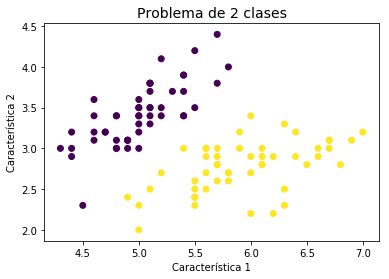

In [66]:
#cargamos la bd iris desde el dataset de sklearn
from sklearn import datasets
iris = datasets.load_iris()

#Esta es la base de datos Iris del UCI Machine Learning Repository 
#https://archive.ics.uci.edu/ml/datasets/iris

X, y = iris.data, iris.target
X2 = X[:100][:,0:2]
y2 = y[:100]
plt.title('Problema de 2 clases', fontsize=15)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.scatter(X2[:,0], X2[:,1], c=y2);



2.1 Cu&aacute;ntas clases tiene el problema?

Con los datos que se cargan solo hay dos clases, aunque la base de datos de iris tiene tres clases.

2.2 Cu&aacute;ntas caracter&iacute;sticas tiene el problema?

Se cargan solo dos caracteristicas  "sepal length in cm" y "sepal width in cm" 

2.3 Cu&aacute;ntas muestras tiene el problema?

Se cargan solo 100 registros o muestras

2.4 El problema es linealmente separable?

Podemos ver que en la grafica anterior dos grupos o clases, con un espacio por donde puede pasar la recta para dividir los datos.

## Ejercicio 3

Complete el código de la siguiente celda llamando el método gradiente_descendente_logistic y pasándole los parámetros correspondientes, use grado $1$ y $\eta=1$. Debe obtener como salída el vector de parámetros W estimado y el valor de error de clasificación. (como criterio de verificación, tenga en cuenta que para $\eta = 1$ y $grado = 1$, el error de clasificación debe ser del $1\%$.

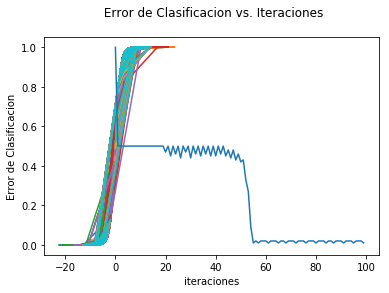

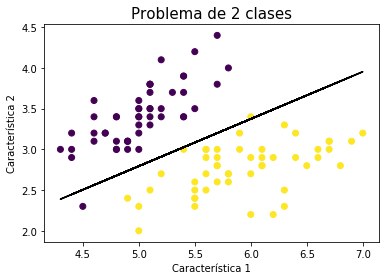

Vector de parámetros del modelo:

[[ -1.13  ]
 [  6.2635]
 [-10.804 ]]

Error de clasificación = 0.01
Errores: 
[1.   0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
 0.5  0.5  0.5  0.5  0.5  0.5  0.47 0.5  0.45 0.5  0.46 0.5  0.44 0.5
 0.47 0.5  0.44 0.5  0.46 0.5  0.45 0.5  0.46 0.5  0.45 0.5  0.45 0.5
 0.46 0.5  0.45 0.48 0.44 0.48 0.43 0.46 0.42 0.43 0.33 0.27 0.09 0.01
 0.02 0.01 0.02 0.02 0.02 0.01 0.02 0.02 0.02 0.01 0.02 0.02 0.01 0.02
 0.02 0.02 0.01 0.02 0.02 0.02 0.01 0.02 0.02 0.02 0.01 0.02 0.02 0.02
 0.01 0.02 0.02 0.01 0.02 0.02 0.02 0.01 0.02 0.02 0.02 0.01 0.02 0.02
 0.02 0.01]
Y estimado: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

In [85]:
#Completa la siguiente línea con el llamado al método gradiente_descendente_logistic con sus respectivos argumentos
w = gradiente_descendente_logistic(X2,y2,1,1)


## Ejercicio 3

3.1 Escriba el modelo $f(\textbf{x},\textbf{w})$, una vez haya estimado el vector de par&aacute;metros del mismo.


3.2 Qué valor de error de clasificación obtuvo? 

3.3 Basado en el valor del error obtenido, cu&aacute;ntas muestras clasifica mal el modelo?

3.4 Grafique las muestras y la frontera de decisi&oacute;n alcanzada?

3.5 Alguna muestra cae sobre la frontera de decisi&oacute;n? En caso afirmativo, dicha muestra es bien o mal clasificada y por qu&eacute;?

Responda aquí:
    
3.1 R:/ $f(\textbf{x},\textbf{w})= -1.13 + 6.2535x_1 -10.804x_2$

3.2 R:/ Se obtuvo un error de clasificacion del 1% ó 0.01

3.3 R:/ Segun el error de clasificación, de 100 muestras 1 sale mal clasificada

3.4 R:/

3.5 R:/